#imports

---



data from: https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset?resource=download

In [243]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
import requests
import numpy as np

In [244]:
#import data
df=pd.read_csv('earthquake_data_tsunami.csv')

---
#about data


The Global Earthquake-Tsunami Risk Assessment Dataset is a comprehensive, machine learning-ready dataset containing seismic characteristics and tsunami potential indicators for 782 significant earthquakes recorded globally from 2001 to 2022. This dataset is specifically designed for tsunami risk prediction, earthquake analysis, and seismic hazard assessment applications.



In [245]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


#data overveiw


| Feature     | Type     | Description                                  | Range/Values                 | Tsunami Relevance                         |
|------------|----------|----------------------------------------------|-----------------------------|-------------------------------------------|
| magnitude  | Float    | Earthquake magnitude (Richter scale)          | 6.5 – 9.1                   | **High** – primary tsunami predictor      |
| cdi        | Integer  | Community Decimal Intensity (felt intensity)  | 0 – 9                       | Medium – population impact measure        |
| mmi        | Integer  | Modified Mercalli Intensity (instrumental)    | 1 – 9                       | Medium – structural damage indicator      |
| sig        | Integer  | Event significance score                      | 650 – 2910                  | **High** – overall hazard assessment      |
| nst        | Integer  | Number of seismic monitoring stations         | 0 – 934                     | Low – data quality indicator              |
| dmin       | Float    | Distance to nearest seismic station (degrees) | 0.0 – 17.7                  | Low – location precision                  |
| gap        | Float    | Azimuthal gap between stations (degrees)      | 0.0 – 239.0                 | Low – location reliability                |
| depth      | Float    | Earthquake focal depth (km)                   | 2.7 – 670.8                 | **High** – shallow = higher tsunami risk  |
| latitude   | Float    | Epicenter latitude (WGS84)                    | −61.85° to 71.63°           | **High** – ocean proximity indicator      |
| longitude  | Float    | Epicenter longitude (WGS84)                   | −179.97° to 179.66°         | **High** – ocean proximity indicator      |
| Year       | Integer  | Year of occurrence                           | 2001 – 2022                 | Medium – temporal patterns                |
| Month      | Integer  | Month of occurrence                          | 1 – 12                      | Low – seasonal analysis                   |
| tsunami    | Binary   | **Tsunami potential (TARGET)**               | 0, 1                        | **TARGET VARIABLE**                       |


---
#cleaning data
the description of this set said the set was machine learning ready meaning it should already be clean and free of null values so cleaning shouldnt be necessary but I will still check


In [246]:
df.info() # they are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [247]:
df.describe()#data looks normal

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


I see nothing out of the ordinary here the dataset was already cleaned

#manipulation data

In [248]:
# this data was made for machine learning and thus lacks some human readibillty lets fix this

In [249]:
df['tsunami'].replace({0:False,1:True},inplace=True)

/tmp/ipython-input-2715303883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tsunami'].replace({0:False,1:True},inplace=True)
/tmp/ipython-input-2715303883.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tsunami'].replace({0:False,1:True},inplace=True)


In [250]:
#this is ai generated


# Global variable to cache coastline data
_coastline_tree = None
_coastline_points = None

def load_coastline_data():
    """
    Download and cache coastline data from Natural Earth.
    This only needs to be called once.
    """
    global _coastline_tree, _coastline_points

    if _coastline_tree is not None:
        return  # Already loaded

    print("Loading coastline data...")

    url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_coastline.geojson"

    try:
        response = requests.get(url)
        geojson = response.json()

        coastline_points = []
        for feature in geojson['features']:
            if feature['geometry']['type'] == 'LineString':
                coords = feature['geometry']['coordinates']
                coastline_points.extend([(lat, lon) for lon, lat in coords])
            elif feature['geometry']['type'] == 'MultiLineString':
                for line in feature['geometry']['coordinates']:
                    coastline_points.extend([(lat, lon) for lon, lat in line])

        _coastline_points = np.array(coastline_points)
        _coastline_tree = cKDTree(_coastline_points)

        print(f"Loaded {len(coastline_points)} coastline points")

    except Exception as e:
        print(f"Error loading coastline: {e}")
        raise

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees).
    Returns distance in kilometers.
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371  # Radius of earth in kilometers
    return c * r

def distance_to_ocean(lat, lon):
    """
    Calculate the distance from a given lat/lon to the nearest ocean/coastline.

    Parameters:
    -----------
    lat : float
        Latitude in decimal degrees
    lon : float
        Longitude in decimal degrees

    Returns:
    --------
    float
        Distance to nearest coastline in kilometers

    Example:
    --------
    >>> distance_to_ocean(38.0, -122.0)  # San Francisco area
    5.2
    """
    # Load coastline data if not already loaded
    if _coastline_tree is None:
        load_coastline_data()

    # Find nearest coastline point
    _, index = _coastline_tree.query([lat, lon])
    nearest_coast_lat, nearest_coast_lon = _coastline_points[index]

    # Calculate accurate distance using Haversine formula
    distance = haversine_distance(lat, lon, nearest_coast_lat, nearest_coast_lon)

    return distance




In [251]:
#distance to ocean
df['ocean_distance_km']=df.apply(lambda row: distance_to_ocean(row['latitude'],row['longitude']),axis=1)

Loading coastline data...
Loaded 5128 coastline points


In [252]:
#filtered data sets
df_tsunami=df[df['tsunami']==True]

In [253]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,ocean_distance_km
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,True,18.038625
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,False,216.764428
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,True,426.094946
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,True,880.423456
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,True,813.259002


In [254]:
#group by years
magnitude_over_years = df.groupby('Year')['magnitude'].mean().sort_index(ascending=False)
magnitude_over_years.head()

,magnitude
Year,
2022,6.812500
2021,7.052381
2020,6.911111
2019,6.860606
2018,6.953488


In [255]:
#bins of magnitude
df['magnitude_bin'] = pd.cut(df['magnitude'],
                              bins=5,
                              labels=['6.5-7.0', '7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.1'])

In [256]:
#bins of distance
df['distance_bin'] = pd.qcut(df['ocean_distance_km'],
                            q=5,
                            labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far'])

In [257]:
#bins of depth
df['depth_bin'] = pd.qcut(df['depth'],
                            q=5,
                            labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far'])

In [258]:
#all previous bins except tsunamis only
df_tsunami['magnitude_bin'] = pd.cut(df_tsunami['magnitude'],
                              bins=5,
                              labels=['6.5-7.0', '7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.1'])
df_tsunami['distance_bin'] = pd.qcut(df_tsunami['ocean_distance_km'],
                            q=5,
                            labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far'])
df_tsunami['depth_bin'] = pd.qcut(df_tsunami['depth'],
                            q=5,
                            labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far'])


/tmp/ipython-input-1582230438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tsunami['magnitude_bin'] = pd.cut(df_tsunami['magnitude'],
/tmp/ipython-input-1582230438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tsunami['distance_bin'] = pd.qcut(df_tsunami['ocean_distance_km'],
/tmp/ipython-input-1582230438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

#visulations

In [259]:
!pip install basemap basemap-data-hires

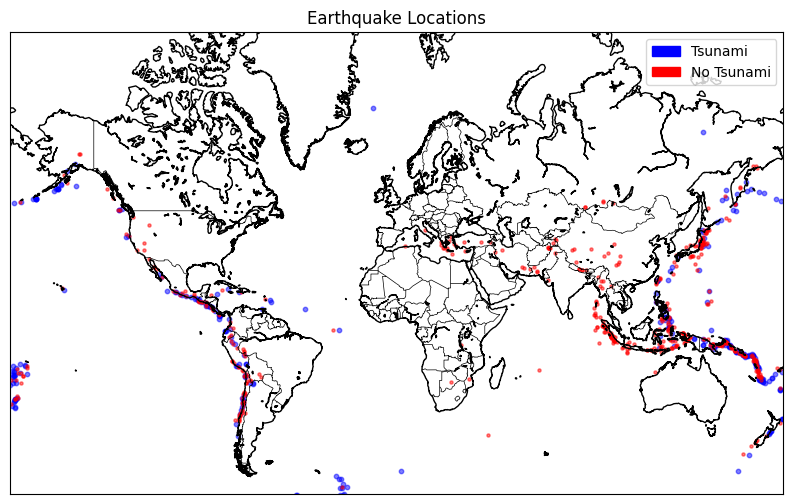

In [260]:
#this section has had heavy ai use
#install mpl_tooklits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
m = Basemap(projection='merc',
            llcrnrlat=-60, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='l')

m.drawcoastlines()
m.drawcountries()

# Convert coords
x, y = m(df['longitude'].values, df['latitude'].values)

# Scatter w/ hue
scatter_tsunami_true = m.scatter(
    x[df['tsunami'] == True], y[df['tsunami'] == True],
    c='blue',       # color for tsunami=True
    label='Tsunami',
    s=10,                   # point size
    alpha=0.5,              # transparency
)

scatter_tsunami_false = m.scatter(
    x[df['tsunami'] == False], y[df['tsunami'] == False],
    c='red',       # color for tsunami=False
    label='No Tsunami',
    s=5,                   # point size
    alpha=0.5,              # transparency
)

# Create custom legend handles
tsunami_patch = mpatches.Patch(color='blue', label='Tsunami')
no_tsunami_patch = mpatches.Patch(color='red', label='No Tsunami')


# Add colorbar legend
# plt.colorbar(sc, label="Category") # Removed colorbar

plt.legend(handles=[tsunami_patch, no_tsunami_patch])
plt.title('Earthquake Locations')
plt.show()

m

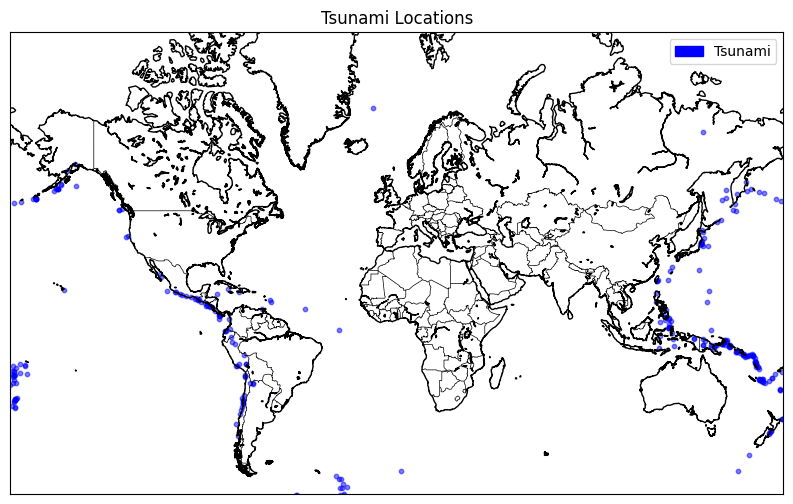

In [291]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
m = Basemap(projection='merc',
            llcrnrlat=-60, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='l')

m.drawcoastlines()
m.drawcountries()

# Convert coords
x, y = m(df['longitude'].values, df['latitude'].values)

# Scatter w/ hue
scatter_tsunami_true = m.scatter(
    x[df['tsunami'] == True], y[df['tsunami'] == True],
    c='blue',       # color for tsunami=True
    label='Tsunami',
    s=10,                   # point size
    alpha=0.5,              # transparency
)


# Create custom legend handles
tsunami_patch = mpatches.Patch(color='blue', label='Tsunami')



# Add colorbar legend
# plt.colorbar(sc, label="Category") # Removed colorbar

plt.legend(handles=[tsunami_patch])
plt.title('Tsunami Locations')
plt.show()

<Axes: xlabel='tsunami', ylabel='count'>

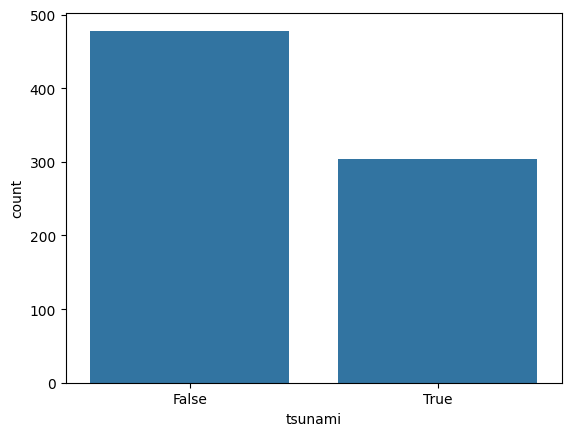

In [262]:
sns.countplot(x='tsunami',data=df)

<Axes: xlabel='magnitude', ylabel='ocean_distance_km'>

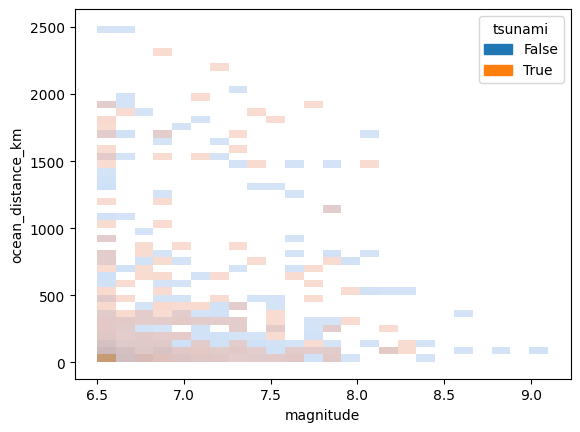

In [263]:
sns.histplot(x='magnitude',y='ocean_distance_km',hue='tsunami',data=df,alpha=0.5)

<Axes: xlabel='magnitude', ylabel='depth'>

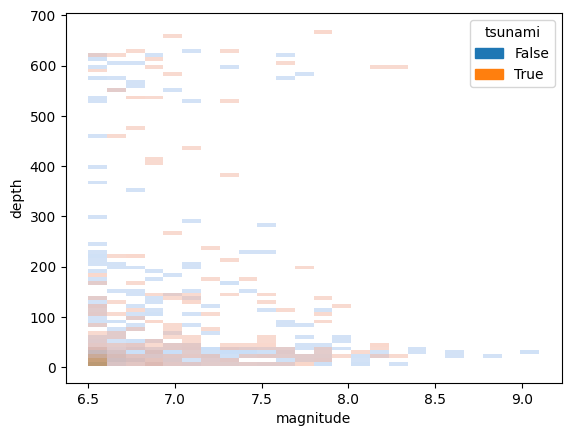

In [264]:
#magnitude depth chart
sns.histplot(y='depth',x='magnitude',hue='tsunami',data=df,alpha=0.5)

<Axes: xlabel='depth', ylabel='ocean_distance_km'>

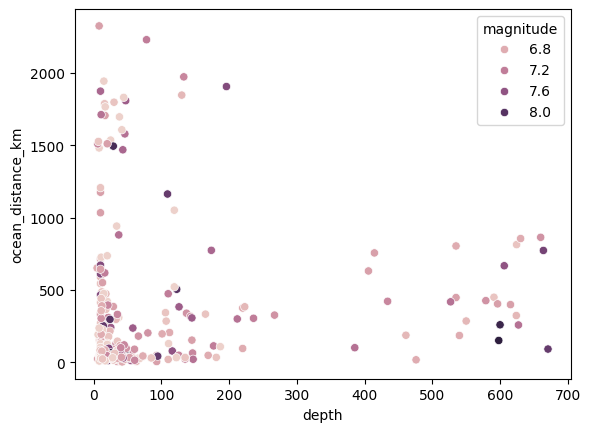

In [265]:
sns.scatterplot(x='depth',y='ocean_distance_km',hue='magnitude',data=df_tsunami)

<Axes: xlabel='depth', ylabel='ocean_distance_km'>

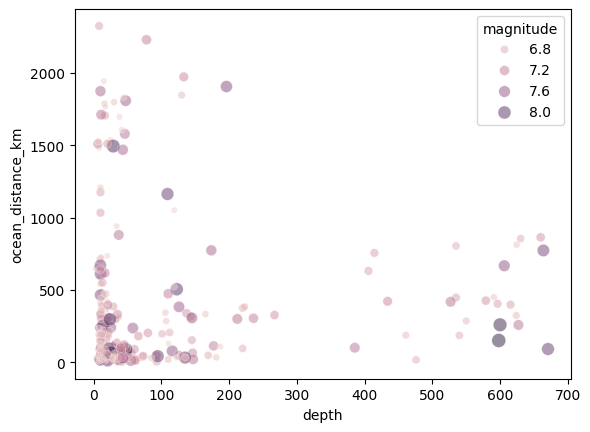

In [266]:
sns.scatterplot(x='depth',y='ocean_distance_km',hue='magnitude',data=df_tsunami,alpha=0.5,size='magnitude',sizes=(20,100))
#
#we use the df_tsunami to avoid over plotting

In [267]:
df['Year'].min()

2001

([<matplotlib.axis.XTick at 0x7c7fe3b8fc50>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

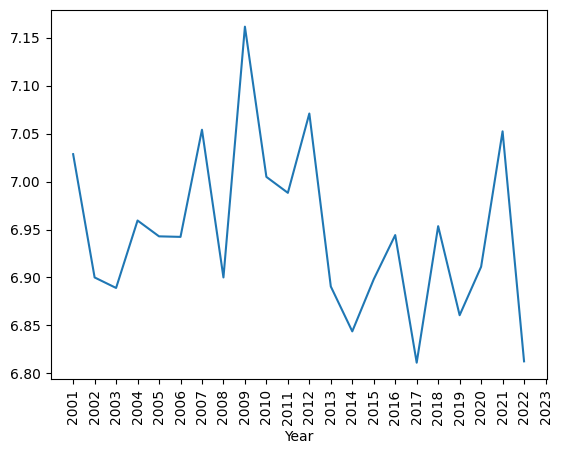

In [268]:
#magnitude over years
sns.lineplot(x=magnitude_over_years.index,y=magnitude_over_years.values)
plt.xticks([2001,2002, 2003, 2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],rotation=90)

Text(0.5, 1.03, 'Ocean Distance vs Depth vs Magnitude (by Tsunami Occurrence)')

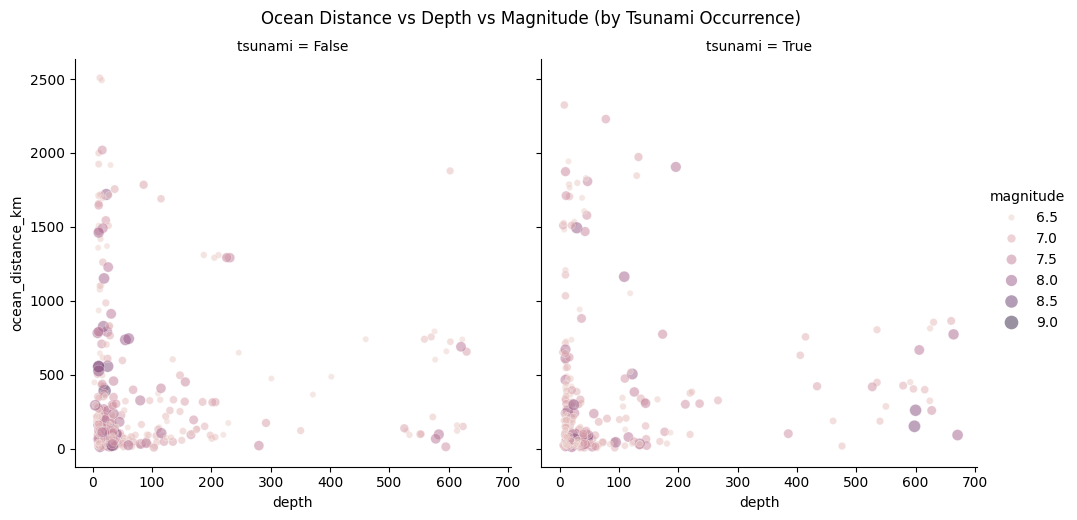

In [289]:
g = sns.relplot(x='depth',y='ocean_distance_km',hue='magnitude',data=df,alpha=0.5,size='magnitude',sizes=(20,100),col='tsunami',kind='scatter')
g.fig.suptitle('Ocean Distance vs Depth vs Magnitude (by Tsunami Occurrence)', y=1.03) # Add title with padding

#
#
#

Text(0.5, 1.0, 'tsunami occurance count by magnitude')

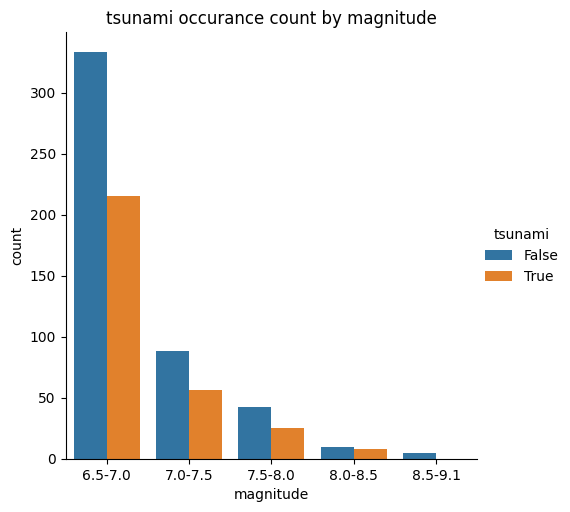

In [292]:
#graph tsunami rate of bins magnitude
sns.catplot(data=df,x='magnitude_bin',hue='tsunami',kind='count')
plt.xlabel("magnitude")
plt.title("tsunami occurance count by magnitude")

Text(0.5, 29.140624999999986, 'depth in km')

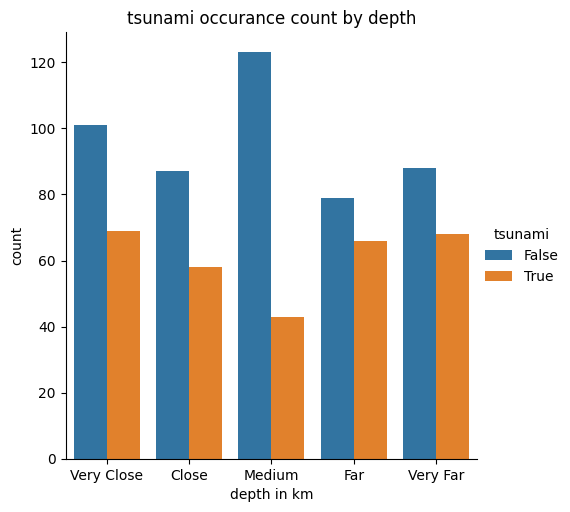

In [295]:
#graph tsunami rate of bins depth
sns.catplot(data=df,x='depth_bin',hue='tsunami',kind='count',)
plt.title("tsunami occurance count by depth")
plt.xlabel("depth in km")

Text(0.5, 1.0, 'tsunami occurance count by distance')

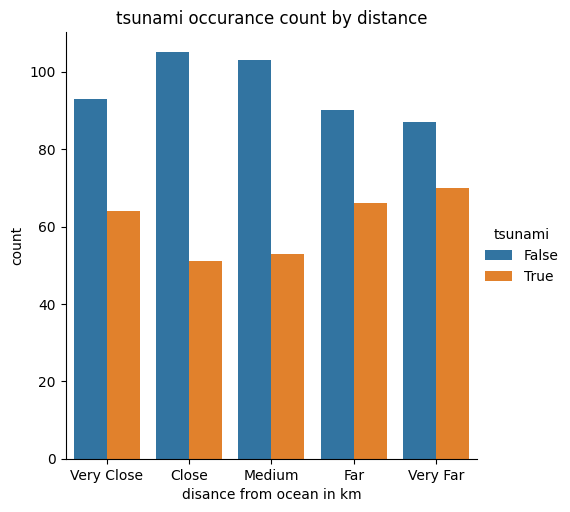

In [296]:
#graph tsunami rate of bins ocean distance
sns.catplot(data=df,x='distance_bin',hue='tsunami',kind='count')
plt.xlabel("disance from ocean in km")
plt.title("tsunami occurance count by distance")

---
#analysis

In [273]:
df[['magnitude','depth','Year','ocean_distance_km','tsunami']].describe()

,magnitude,depth,Year,ocean_distance_km
count,782.000000,782.000000,782.000000,782.000000
mean,6.941125,75.883199,2012.280051,294.774282
std,0.445514,137.277078,6.099439,455.524814
min,6.500000,2.700000,2001.000000,2.551187
25%,6.600000,14.000000,2007.000000,44.934423
50%,6.800000,26.295000,2013.000000,100.571353
75%,7.100000,49.750000,2017.000000,303.361116
max,9.100000,670.810000,2022.000000,2508.373841


In [286]:
df_tsunami[['magnitude','depth','Year','ocean_distance_km','tsunami']].describe()

,magnitude,depth,Year,ocean_distance_km
count,304.000000,304.000000,304.000000,304.000000
mean,6.938487,85.656796,2017.226974,327.601009
std,0.423250,151.080342,2.958089,484.667270
min,6.500000,5.000000,2013.000000,2.551187
25%,6.600000,13.807500,2015.000000,43.283622
50%,6.800000,26.971500,2017.000000,107.009803
75%,7.100000,61.147500,2020.000000,358.387896
max,8.300000,670.810000,2022.000000,2324.615048


In [274]:
df['tsunami'].value_counts()

,count
tsunami,
False,478
True,304


In [275]:
df[['magnitude','depth','Year','ocean_distance_km','tsunami']].corr()

,magnitude,depth,Year,ocean_distance_km,tsunami
magnitude,1.000000,0.030644,-0.057083,0.030089,-0.004726
depth,0.030644,1.000000,0.178220,0.097583,0.056814
Year,-0.057083,0.178220,1.000000,0.178040,0.647211
ocean_distance_km,0.030089,0.097583,0.178040,1.000000,0.057506
tsunami,-0.004726,0.056814,0.647211,0.057506,1.000000


In [276]:
#values in bins
print(df.groupby('magnitude_bin')['tsunami'].value_counts())
print(df.groupby('distance_bin')['tsunami'].value_counts())
print(df.groupby('depth_bin')['tsunami'].value_counts())

magnitude_bin  tsunami
6.5-7.0        False      333
               True       215
7.0-7.5        False       88
               True        56
7.5-8.0        False       42
               True        25
8.0-8.5        False       10
               True         8
8.5-9.1        False        5
               True         0
Name: count, dtype: int64
distance_bin  tsunami
Very Close    False       93
              True        64
Close         False      105
              True        51
Medium        False      103
              True        53
Far           False       90
              True        66
Very Far      False       87
              True        70
Name: count, dtype: int64
depth_bin   tsunami
Very Close  False      101
            True        69
Close       False       87
            True        58
Medium      False      123
            True        43
Far         False       79
            True        66
Very Far    False       88
            True        68
Name: count, dtype: int

/tmp/ipython-input-1362710282.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('magnitude_bin')['tsunami'].value_counts())
/tmp/ipython-input-1362710282.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('distance_bin')['tsunami'].value_counts())
/tmp/ipython-input-1362710282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('depth_bin')['tsunami'].value_counts())


In [277]:
#tsunami rate in bins
print(df.groupby('magnitude_bin')['tsunami'].mean())
print(df.groupby('distance_bin')['tsunami'].mean())
print(df.groupby('depth_bin')['tsunami'].mean())

magnitude_bin
6.5-7.0    0.392336
7.0-7.5    0.388889
7.5-8.0    0.373134
8.0-8.5    0.444444
8.5-9.1    0.000000
Name: tsunami, dtype: float64
distance_bin
Very Close    0.407643
Close         0.326923
Medium        0.339744
Far           0.423077
Very Far      0.445860
Name: tsunami, dtype: float64
depth_bin
Very Close    0.405882
Close         0.400000
Medium        0.259036
Far           0.455172
Very Far      0.435897
Name: tsunami, dtype: float64


/tmp/ipython-input-3105480560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('magnitude_bin')['tsunami'].mean())
/tmp/ipython-input-3105480560.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('distance_bin')['tsunami'].mean())
/tmp/ipython-input-3105480560.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('depth_bin')['tsunami'].mean())


---
#results

# FINAL-PROJECT-earth-quake-factors-and-tsunami's

## Dataset Description

### Overview
This dataset contains **782 earthquake records**. The Global Earthquake-Tsunami Risk Assessment Dataset is a comprehensive, machine learning-ready dataset containing seismic characteristics and tsunami potential indicators for 782 significant earthquakes recorded globally from 2001 to 2022. This dataset is specifically designed for tsunami risk prediction, earthquake analysis, and seismic hazard assessment applications.

## key-question
does the conditions present in a earth quake determine if a tsunami is present and if so can i use a model to predict the chance of a tsunami occuring given conditions

### Feature Descriptions

| Feature     | Type     | Description                                  | Range/Values                 | Tsunami Relevance                         |
|------------|----------|----------------------------------------------|-----------------------------|-------------------------------------------|
| magnitude  | Float    | Earthquake magnitude (Richter scale)          | 6.5 – 9.1                   | **High** – primary tsunami predictor      |
| cdi        | Integer  | Community Decimal Intensity (felt intensity)  | 0 – 9                       | Medium – population impact measure        |
| mmi        | Integer  | Modified Mercalli Intensity (instrumental)    | 1 – 9                       | Medium – structural damage indicator      |
| sig        | Integer  | Event significance score                      | 650 – 2910                  | **High** – overall hazard assessment      |
| nst        | Integer  | Number of seismic monitoring stations         | 0 – 934                     | Low – data quality indicator              |
| dmin       | Float    | Distance to nearest seismic station (degrees) | 0.0 – 17.7                  | Low – location precision                  |
| gap        | Float    | Azimuthal gap between stations (degrees)      | 0.0 – 239.0                 | Low – location reliability                |
| depth      | Float    | Earthquake focal depth (km)                   | 2.7 – 670.8                 | **High** – shallow = higher tsunami risk  |
| latitude   | Float    | Epicenter latitude (WGS84)                    | −61.85° to 71.63°           | **High** – ocean proximity indicator      |
| longitude  | Float    | Epicenter longitude (WGS84)                   | −179.97° to 179.66°         | **High** – ocean proximity indicator      |
| Year       | Integer  | Year of occurrence                           | 2001 – 2022                 | Medium – temporal patterns                |
| Month      | Integer  | Month of occurrence                          | 1 – 12                      | Low – seasonal analysis                   |
| tsunami    | Binary   | **Tsunami potential (TARGET)**               | 0, 1                        | **TARGET VARIABLE**                       |

### Key Dataset Characteristics
- **Total Records**: 782 earthquakes
- **Temporal Coverage**: 21 years (2001-2022)
- **Magnitude Threshold**: All earthquakes ≥6.5 magnitude
- **Geographic Scope**: Global coverage
- **Tsunami Events**: 304 (38.9%)
- **Non-Tsunami Events**: 478 (61.1%)
- **Data Quality**: Pre-cleaned with verified seismic parameters

## Data Preparation and Methodology

### Initial Dataset Condition
The dataset was obtained in a pre-cleaned state, containing earthquake records with basic seismic parameters. However, significant manipulation and feature engineering were required to enable meaningful analysis of tsunami generation patterns.

### Feature Engineering

#### Ocean Distance Calculation
A critical variable for tsunami analysis—distance from the ocean—was not present in the original dataset. This feature was calculated using the latitude and longitude coordinates of each earthquake epicenter. The `ocean_distance_km` column was created by computing the shortest distance from each earthquake location to the nearest ocean coastline, providing a quantitative measure of how proximity to water bodies influences tsunami generation potential.

#### Binning Strategy for Categorical Analysis
To better understand the relationship between continuous variables and tsunami occurrence, three key variables were transformed into categorical bins:

**Magnitude Bins:**
- 6.5-7.0
- 7.0-7.5
- 7.5-8.0
- 8.0-8.5
- 8.5-9.1

These equal-width bins allow for comparison of tsunami rates across energy levels while accounting for the logarithmic nature of the magnitude scale.

**Distance Bins:**
Created using quantile-based binning to ensure roughly equal sample sizes:
- Very Close
- Close
- Medium
- Far
- Very Far

This approach addresses the highly skewed distribution of ocean distances (min: 2.6 km, mean: 294.8 km, max: 2508.4 km).

**Depth Bins:**
Created using quantile-based binning:
- Very Shallow
- Shallow
- Medium
- Deep
- Very Deep

This binning strategy facilitates analysis of how depth influences tsunami generation while maintaining adequate sample sizes in each category for statistical comparison.

The binning approach enabled stratified analysis to control for confounding variables and examine the independent effects of each factor on tsunami occurrence.

### Data Type Optimization

#### Boolean Conversion
After initial correlation analysis revealed no strong linear relationships with the numeric tsunami variable, the `tsunami` column was converted from a binary numeric variable (0/1) to a boolean type (False/True). This conversion improved:
- Human readability in data exploration
- Clarity in filtering operations
- Semantic accuracy (tsunami occurrence is inherently a categorical, not quantitative, variable)

### Filtered Dataset Creation

#### Tsunami-Only Subset
A filtered version of the dataset containing only tsunami-generating earthquakes (tsunami=True, n=304) was created to facilitate targeted analysis. This subset enabled:

**Variable Grouping Analysis:**
- Examination of which combinations of magnitude, depth, and distance are present when tsunamis do occur
- Identification of typical conditions for successful tsunami generation
- Calculation of central tendencies (median magnitudes) within each categorical bin for tsunami events

**Factor Presence Investigation:**
- Determination of whether certain conditions are universally present in tsunami events
- Analysis of the distribution of tsunami-generating earthquakes across binned categories
- Assessment of whether tsunamis cluster in predictable parameter ranges

**Simplified Comparative Analysis:**
By isolating tsunami events, comparisons could be made more efficiently between different groupings (e.g., shallow vs. deep tsunami earthquakes, near vs. far tsunami earthquakes) without the need for repeated filtering operations during exploratory analysis.

This methodological approach—combining feature engineering, categorical binning, data type optimization, and strategic subsetting—provided the analytical framework necessary to uncover the complex, multivariate relationships between earthquake characteristics and tsunami generation.
# Earthquake and Tsunami Analysis: Key Findings

## Dataset Overview
- **Total earthquakes analyzed**: 782
- **Tsunami-generating earthquakes**: 304 (38.9%)
- **Non-tsunami earthquakes**: 478 (61.1%)
- **Magnitude range**: 6.5 - 9.1 (mean: 6.94)
- **Depth range**: 2.7 - 670.8 km (mean: 75.9 km)
- **Distance from ocean range**: 2.6 - 2508.4 km (mean: 294.8 km)
- **Time period**: 2001 - 2022

## Dataset Limitations
- **Magnitude threshold**: Only earthquakes ≥6.5 magnitude included
- **Missing critical variable**: Fault mechanism/type data not available


## Primary Findings

### 1. No Single Variable Shows Direct Correlation
Correlation analysis reveals extremely weak relationships between individual variables and tsunami occurrence:
- **Magnitude vs Tsunami**: r = -0.005 (essentially zero)
- **Depth vs Tsunami**: r = 0.057 (very weak)
- **Distance vs Tsunami**: r = 0.058 (very weak)

No individual variable demonstrates a simple, direct correlation with tsunami occurrence. Instead, tsunami generation requires a **combination of conditions** working together, with an additional unmeasured factor playing a critical role.

### 2. Necessary but Not Sufficient Conditions

While individual correlations are weak, tsunamis consistently occur under specific conditions. However, **the majority of earthquakes meeting all favorable criteria do not generate tsunamis**.

#### Distribution by Magnitude:
| Magnitude Range | Total Quakes | Tsunamis | Tsunami Rate |
|-----------------|--------------|----------|--------------|
| 6.5-7.0         | 548          | 215      | 39.2%        |
| 7.0-7.5         | 144          | 56       | 38.9%        |
| 7.5-8.0         | 67           | 25       | 37.3%        |
| 8.0-8.5         | 18           | 8        | 44.4%        |
| 8.5-9.1         | 5            | 0        | 0.0%         |

**Key observation**: Tsunami rates remain relatively constant (~37-44%) across magnitude ranges from 6.5-8.5, showing no clear increasing trend with magnitude. The 8.5-9.1 category shows 0% due to small sample size (only 5 earthquakes).

#### Distribution by Distance from Ocean:
| Distance Category | Total Quakes | Tsunamis | Tsunami Rate |
|-------------------|--------------|----------|--------------|
| Very Close        | 157          | 64       | 40.8%        |
| Close             | 156          | 51       | 32.7%        |
| Medium            | 156          | 53       | 33.9%        |
| Far               | 156          | 66       | 42.3%        |
| Very Far          | 157          | 70       | 44.6%        |

**Key observation**: A U-shaped pattern emerges—high tsunami rates at both very close (40.8%) and very far (44.6%) distances, with lower rates in the middle range (~33%). This counterintuitive pattern reveals important selection effects discussed below.

#### Distribution by Depth:
| Depth Category | Total Quakes | Tsunamis | Tsunami Rate |
|----------------|--------------|----------|--------------|
| Very Shallow   | 170          | 69       | 40.6%        |
| Shallow        | 145          | 58       | 40.0%        |
| Medium         | 166          | 43       | 25.9%        |
| Deep           | 145          | 66       | 45.5%        |
| Very Deep      | 156          | 68       | 43.6%        |

**Key observation**: Medium-depth earthquakes show the lowest tsunami rate (25.9%), while shallow and deep categories show similar rates (40-45%). This unexpected pattern also reflects selection effects in the data.

### 3. Magnitude Findings

**Across Distance Categories (Tsunami earthquakes only):**
Tsunami-generating earthquakes exhibit remarkably consistent median magnitudes across all distance categories:
- Very Close: 6.88
- Close: 6.96
- Medium: 6.96
- Far: 6.93
- Very Far: 6.96

This narrow range (6.88-6.96) demonstrates that **distance from ocean does not require substantially different magnitudes for tsunami generation**. All values cluster just below magnitude 7.0, approaching the commonly cited threshold from NOAA for tsunami warnings.

**Across Depth Categories (Tsunami earthquakes only):**
A modest but clear depth-magnitude relationship exists:
- Very Shallow: 6.81
- Shallow: 6.81
- Medium: 6.98
- Deep: 7.02
- Very Deep: 7.07

**Magnitude increase of 0.26 units from shallowest to deepest** (representing approximately 1.8× more seismic energy). This reflects the physical reality that deeper earthquakes must release more energy to achieve sufficient seafloor displacement for tsunami generation.

### 4. The Importance of All Four Variables

While no single variable shows direct correlation, the analysis reveals that **magnitude, depth, distance from ocean, and fault type all matter**:

#### Magnitude
Provides the energy necessary for significant seafloor displacement. The Richter/Moment Magnitude scale is logarithmic—each whole number increase represents 10× more ground motion and ~31.6× more energy released. Despite this, tsunami rates remain relatively stable across magnitude ranges, indicating magnitude alone is insufficient for prediction.

#### Depth
measured in km below surface
Influences the efficiency of energy transfer to the ocean surface. The depth-magnitude relationship among tsunami earthquakes (0.26 magnitude increase from shallow to deep) confirms that deeper earthquakes require more energy to generate tsunamis.

According to NOAA, earthquakes must occur less than 100 kilometers (62 miles) below Earth's surface because earthquakes deeper than this are unlikely to displace the ocean floor. Research from the University of Hawaii's School of Ocean and Earth Science and Technology (SOEST) provides the physical explanation: in subduction zones, the upper plate is thinner and less rigid than the underthrusting plate near the trench, and a concentrated near-trench or shallow rupture produces relatively weak ground shaking as recorded by seismometers, but the displaced water in the overlying deep ocean has enhanced energy and produces shorter tsunami waves that amplify at a high rate as they move toward the shore.

The key finding from SOEST research is that for a given earthquake magnitude, if the rupture extends to shallow depth in the less rigid part of the plate, the resulting tsunami is larger than if the rupture is deeper. This explains why shallow earthquakes more efficiently generate tsunamis:
- Less energy dissipation through overlying rock
- More direct seafloor displacement
- Shallow crust properties allow greater vertical movement and more efficient water displacement

However, the unexpected similarity in tsunami rates between shallow (40%) and deep (43-45%) categories in this dataset suggests that when deep earthquakes DO generate tsunamis, they tend to be the stronger ones (median magnitude 7.07 vs 6.81 for shallow) that successfully overcome the depth disadvantage through sheer energy.

#### Distance from Ocean
measured in km
The weak correlation (r = 0.058) and U-shaped distribution pattern reveal complex dynamics. Distance affects whether displaced water reaches inhabited coastlines and whether tsunamis are detected/reported, but shows minimal effect on the magnitude required for generation itself. The consistent magnitudes (6.88-6.96) across all distance bins confirm this.

#### Fault Type (Unmeasured—The Critical Missing Variable)
NOAA explains that an earthquake must be big enough and close enough to the ocean floor to cause the vertical movement of the ocean floor that typically sets a tsunami in motion. The critical insight is that earthquake fault mechanism determines the **direction of movement**:

- **Thrust/reverse faults** (vertical/upward-downward movement): Displace water vertically → tsunami possible
- **Strike-slip faults** (horizontal movement): Minimal water displacement → tsunami unlikely
- **Normal faults** (vertical/downward movement): Can displace water → sometimes generate tsunamis

Since magnitude measures only the intensity of ground shaking (total energy released), not the directionality of movement, two earthquakes of identical magnitude, depth, and location can have completely different tsunami outcomes based solely on fault mechanism. According to supplementary research from NOAA sources, the vertical displacement characteristic of thrust faults in subduction zones is what enables efficient water displacement and tsunami generation, while horizontal strike-slip movement—regardless of magnitude—does not produce the vertical seafloor motion necessary for significant tsunami generation.

### 5. Why Most "Perfect Condition" Earthquakes Don't Generate Tsunamis

Even within favorable condition categories, **60-67% of earthquakes do not generate tsunamis**:
- Very Close + Very Shallow earthquakes: ~60% non-tsunami
- High magnitude (7.0-8.5): ~56-63% non-tsunami

The discriminating factor appears to be **fault mechanism**—whether the earthquake produces vertical seafloor displacement. This explains why:
- Simple magnitude and location thresholds are insufficient for tsunami prediction
- Modern tsunami warning systems require rapid seismic analysis to determine fault type
- Ocean buoy networks detect actual water displacement rather than relying solely on earthquake characteristics

## Confounding and Selection Effects

The analysis revealed important confounding patterns that initially appear counterintuitive:

**U-Shaped Distance Pattern:** High tsunami rates at both very close (40.8%) AND very far (44.6%) distances, with lower rates at medium distances (33%). This is a **selection effect**—distant earthquakes that successfully generate detectable tsunamis are disproportionately large magnitude events. They don't generate tsunamis more easily at distance; rather, only the most powerful distant earthquakes overcome the disadvantage to produce observable tsunamis that get recorded in the dataset.

**Similar Depth Pattern:** Shallow (40%) and deep (43-45%) earthquakes show similar tsunami rates, while medium-depth shows the lowest (26%). Again, this reflects selection: deep earthquakes in this dataset that generate tsunamis are likely the stronger ones (median magnitude 7.07 vs 6.81 for shallow), having overcome the depth disadvantage through sheer energy—consistent with the SOEST findings that deeper ruptures require more energy to produce equivalent tsunamis.

**Stable Magnitude Rates:** The relatively constant ~38-44% tsunami rate across magnitude categories (6.5-8.5) is the strongest evidence that **magnitude alone cannot predict tsunami occurrence**. If magnitude were the primary factor, we would expect a clear increasing trend.


## Conclusions

This analysis of 782 major earthquakes (magnitude ≥6.5) demonstrates that tsunami generation is a **multivariate, physics-dependent phenomenon** that cannot be predicted from magnitude and location alone.

### The Four Critical Variables:

1. **Magnitude** (energy available) - Shows near-zero correlation (r = -0.005) but remains necessary; most tsunami earthquakes cluster around magnitude 6.8-7.0

2. **Depth** (efficiency of energy transfer to water displacement) - Weak correlation (r = 0.057) but shows clear physical relationship; deeper tsunamis require ~0.26 higher magnitude. Research from SOEST demonstrates that shallow ruptures produce enhanced tsunami energy due to the less rigid properties of shallow plate materials and more efficient water displacement.

3. **Distance from ocean** (propagation and detection) - Weak correlation (r = 0.058); does not substantially affect magnitude requirements for generation

4. **Fault mechanism** (direction of displacement—vertical vs horizontal) - **CRITICAL but unmeasured in this dataset**; NOAA research confirms that vertical seafloor movement from thrust/reverse faults is what enables tsunami generation, while horizontal movement from strike-slip faults does not produce significant water displacement regardless of magnitude

### Key Insights:

**Only 38.9% of major earthquakes (≥6.5) generate tsunamis**, even though all possess sufficient energy. Within favorable condition categories, this rate holds relatively constant, indicating that the measured variables (magnitude, depth, distance) establish necessary preconditions but do not determine tsunami occurrence.

**Magnitude measures "how much the earth shakes," not "how much water moves."** Vertical seafloor displacement—determined by fault type—is what actually generates tsunamis. This explains why:
- Two magnitude 7.0 earthquakes at the same depth and location can have opposite outcomes
- Tsunami warning systems require sophisticated rapid seismic analysis of fault mechanisms
- Simple threshold-based alerts (e.g., "magnitude >7.0 + coastal") generate excessive false positives

The absence of fault type data represents a fundamental limitation of this dataset. However, the consistent finding that ~60% of earthquakes with favorable magnitude, depth, and location characteristics fail to generate tsunamis provides strong indirect evidence that **fault mechanism is the primary discriminating factor** between tsunami and non-tsunami earthquakes.

Research from NOAA and the University of Hawaii (SOEST) confirms the physical mechanisms underlying these patterns: vertical fault movement (thrust/reverse) is necessary for water displacement, and shallow ruptures transfer energy to water more efficiently than deep ruptures due to differences in crustal rigidity and the mechanics of wave generation. Understanding the complete physics of earthquake rupture—including the direction and magnitude of seafloor displacement—is essential for accurate tsunami prediction and hazard assessment.

## ansewr to my question
the conditions present in the dataset can only partially indicate whether a tsunami is likely to occur, the available variables successfully identify scenarios with favorable tsunami-generating conditions. However, this dataset is missing a critical variable: fault type. Because the mechanism of fault movement (specifically, vertical displacement) is essential to determining whether an earthquake can produce a tsunami, the absence of this information prevents the development of a model using this dataset alone.

## Sources
- NOAA - Tsunami Generation from Earthquakes: https://www.noaa.gov/jetstream/tsunamis/tsunami-generation-earthquakes
- NOAA - Science Behind Tsunamis: https://www.noaa.gov/explainers/science-behind-tsunamis
- University of Hawaii, School of Ocean and Earth Science and Technology (SOEST) - Earthquake Depth Impacts Potential Tsunami Threat: https://www.soest.hawaii.edu/soestwp/announce/news/earthquake-depth-impacts-potential-tsunami-threat/
- Data Set https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset

#note:
do to time contraints AI helped alot with writing this report all findings are human ai also helped with some of the proggramming


# FINAL-PROJECT-earth-quake-factors-and-tsunami's

## Dataset Description

### Overview
This dataset contains **782 earthquake records**. The Global Earthquake-Tsunami Risk Assessment Dataset is a comprehensive, machine learning-ready dataset containing seismic characteristics and tsunami potential indicators for 782 significant earthquakes recorded globally from 2001 to 2022. This dataset is specifically designed for tsunami risk prediction, earthquake analysis, and seismic hazard assessment applications.

### Feature Descriptions

| Feature     | Type     | Description                                  | Range/Values                 | Tsunami Relevance                         |
|------------|----------|----------------------------------------------|-----------------------------|-------------------------------------------|
| magnitude  | Float    | Earthquake magnitude (Richter scale)          | 6.5 – 9.1                   | **High** – primary tsunami predictor      |
| cdi        | Integer  | Community Decimal Intensity (felt intensity)  | 0 – 9                       | Medium – population impact measure        |
| mmi        | Integer  | Modified Mercalli Intensity (instrumental)    | 1 – 9                       | Medium – structural damage indicator      |
| sig        | Integer  | Event significance score                      | 650 – 2910                  | **High** – overall hazard assessment      |
| nst        | Integer  | Number of seismic monitoring stations         | 0 – 934                     | Low – data quality indicator              |
| dmin       | Float    | Distance to nearest seismic station (degrees) | 0.0 – 17.7                  | Low – location precision                  |
| gap        | Float    | Azimuthal gap between stations (degrees)      | 0.0 – 239.0                 | Low – location reliability                |
| depth      | Float    | Earthquake focal depth (km)                   | 2.7 – 670.8                 | **High** – shallow = higher tsunami risk  |
| latitude   | Float    | Epicenter latitude (WGS84)                    | −61.85° to 71.63°           | **High** – ocean proximity indicator      |
| longitude  | Float    | Epicenter longitude (WGS84)                   | −179.97° to 179.66°         | **High** – ocean proximity indicator      |
| Year       | Integer  | Year of occurrence                           | 2001 – 2022                 | Medium – temporal patterns                |
| Month      | Integer  | Month of occurrence                          | 1 – 12                      | Low – seasonal analysis                   |
| tsunami    | Binary   | **Tsunami potential (TARGET)**               | 0, 1                        | **TARGET VARIABLE**                       |

### Key Dataset Characteristics
- **Total Records**: 782 earthquakes
- **Temporal Coverage**: 21 years (2001-2022)
- **Magnitude Threshold**: All earthquakes ≥6.5 magnitude
- **Geographic Scope**: Global coverage
- **Tsunami Events**: 304 (38.9%)
- **Non-Tsunami Events**: 478 (61.1%)
- **Data Quality**: Pre-cleaned with verified seismic parameters

## Data Preparation and Methodology

### Initial Dataset Condition
The dataset was obtained in a pre-cleaned state, containing earthquake records with basic seismic parameters. However, significant manipulation and feature engineering were required to enable meaningful analysis of tsunami generation patterns.

### Feature Engineering

#### Ocean Distance Calculation
A critical variable for tsunami analysis—distance from the ocean—was not present in the original dataset. This feature was calculated using the latitude and longitude coordinates of each earthquake epicenter. The `ocean_distance_km` column was created by computing the shortest distance from each earthquake location to the nearest ocean coastline, providing a quantitative measure of how proximity to water bodies influences tsunami generation potential.

#### Binning Strategy for Categorical Analysis
To better understand the relationship between continuous variables and tsunami occurrence, three key variables were transformed into categorical bins:

**Magnitude Bins:**
- 6.5-7.0
- 7.0-7.5
- 7.5-8.0
- 8.0-8.5
- 8.5-9.1

These equal-width bins allow for comparison of tsunami rates across energy levels while accounting for the logarithmic nature of the magnitude scale.

**Distance Bins:**
Created using quantile-based binning to ensure roughly equal sample sizes:
- Very Close
- Close
- Medium
- Far
- Very Far

This approach addresses the highly skewed distribution of ocean distances (min: 2.6 km, mean: 294.8 km, max: 2508.4 km).

**Depth Bins:**
Created using quantile-based binning:
- Very Shallow
- Shallow
- Medium
- Deep
- Very Deep

This binning strategy facilitates analysis of how depth influences tsunami generation while maintaining adequate sample sizes in each category for statistical comparison.

The binning approach enabled stratified analysis to control for confounding variables and examine the independent effects of each factor on tsunami occurrence.

### Data Type Optimization

#### Boolean Conversion
After initial correlation analysis revealed no strong linear relationships with the numeric tsunami variable, the `tsunami` column was converted from a binary numeric variable (0/1) to a boolean type (False/True). This conversion improved:
- Human readability in data exploration
- Clarity in filtering operations
- Semantic accuracy (tsunami occurrence is inherently a categorical, not quantitative, variable)

### Filtered Dataset Creation

#### Tsunami-Only Subset
A filtered version of the dataset containing only tsunami-generating earthquakes (tsunami=True, n=304) was created to facilitate targeted analysis. This subset enabled:

**Variable Grouping Analysis:**
- Examination of which combinations of magnitude, depth, and distance are present when tsunamis do occur
- Identification of typical conditions for successful tsunami generation
- Calculation of central tendencies (median magnitudes) within each categorical bin for tsunami events

**Factor Presence Investigation:**
- Determination of whether certain conditions are universally present in tsunami events
- Analysis of the distribution of tsunami-generating earthquakes across binned categories
- Assessment of whether tsunamis cluster in predictable parameter ranges

**Simplified Comparative Analysis:**
By isolating tsunami events, comparisons could be made more efficiently between different groupings (e.g., shallow vs. deep tsunami earthquakes, near vs. far tsunami earthquakes) without the need for repeated filtering operations during exploratory analysis.

This methodological approach—combining feature engineering, categorical binning, data type optimization, and strategic subsetting—provided the analytical framework necessary to uncover the complex, multivariate relationships between earthquake characteristics and tsunami generation.
# Earthquake and Tsunami Analysis: Key Findings

## Dataset Overview
- **Total earthquakes analyzed**: 782
- **Tsunami-generating earthquakes**: 304 (38.9%)
- **Non-tsunami earthquakes**: 478 (61.1%)
- **Magnitude range**: 6.5 - 9.1 (mean: 6.94)
- **Depth range**: 2.7 - 670.8 km (mean: 75.9 km)
- **Distance from ocean range**: 2.6 - 2508.4 km (mean: 294.8 km)
- **Time period**: 2001 - 2022

## Dataset Limitations
- **Magnitude threshold**: Only earthquakes ≥6.5 magnitude included
- **Missing critical variable**: Fault mechanism/type data not available


## Primary Findings

### 1. No Single Variable Shows Direct Correlation
Correlation analysis reveals extremely weak relationships between individual variables and tsunami occurrence:
- **Magnitude vs Tsunami**: r = -0.005 (essentially zero)
- **Depth vs Tsunami**: r = 0.057 (very weak)
- **Distance vs Tsunami**: r = 0.058 (very weak)

No individual variable demonstrates a simple, direct correlation with tsunami occurrence. Instead, tsunami generation requires a **combination of conditions** working together, with an additional unmeasured factor playing a critical role.

### 2. Necessary but Not Sufficient Conditions

While individual correlations are weak, tsunamis consistently occur under specific conditions. However, **the majority of earthquakes meeting all favorable criteria do not generate tsunamis**.

#### Distribution by Magnitude:
| Magnitude Range | Total Quakes | Tsunamis | Tsunami Rate |
|-----------------|--------------|----------|--------------|
| 6.5-7.0         | 548          | 215      | 39.2%        |
| 7.0-7.5         | 144          | 56       | 38.9%        |
| 7.5-8.0         | 67           | 25       | 37.3%        |
| 8.0-8.5         | 18           | 8        | 44.4%        |
| 8.5-9.1         | 5            | 0        | 0.0%         |

**Key observation**: Tsunami rates remain relatively constant (~37-44%) across magnitude ranges from 6.5-8.5, showing no clear increasing trend with magnitude. The 8.5-9.1 category shows 0% due to small sample size (only 5 earthquakes).

#### Distribution by Distance from Ocean:
| Distance Category | Total Quakes | Tsunamis | Tsunami Rate |
|-------------------|--------------|----------|--------------|
| Very Close        | 157          | 64       | 40.8%        |
| Close             | 156          | 51       | 32.7%        |
| Medium            | 156          | 53       | 33.9%        |
| Far               | 156          | 66       | 42.3%        |
| Very Far          | 157          | 70       | 44.6%        |

**Key observation**: A U-shaped pattern emerges—high tsunami rates at both very close (40.8%) and very far (44.6%) distances, with lower rates in the middle range (~33%). This counterintuitive pattern reveals important selection effects discussed below.

#### Distribution by Depth:
| Depth Category | Total Quakes | Tsunamis | Tsunami Rate |
|----------------|--------------|----------|--------------|
| Very Shallow   | 170          | 69       | 40.6%        |
| Shallow        | 145          | 58       | 40.0%        |
| Medium         | 166          | 43       | 25.9%        |
| Deep           | 145          | 66       | 45.5%        |
| Very Deep      | 156          | 68       | 43.6%        |

**Key observation**: Medium-depth earthquakes show the lowest tsunami rate (25.9%), while shallow and deep categories show similar rates (40-45%). This unexpected pattern also reflects selection effects in the data.

### 3. Magnitude Findings

**Across Distance Categories (Tsunami earthquakes only):**
Tsunami-generating earthquakes exhibit remarkably consistent median magnitudes across all distance categories:
- Very Close: 6.88
- Close: 6.96
- Medium: 6.96
- Far: 6.93
- Very Far: 6.96

This narrow range (6.88-6.96) demonstrates that **distance from ocean does not require substantially different magnitudes for tsunami generation**. All values cluster just below magnitude 7.0, approaching the commonly cited threshold from NOAA for tsunami warnings.

**Across Depth Categories (Tsunami earthquakes only):**
A modest but clear depth-magnitude relationship exists:
- Very Shallow: 6.81
- Shallow: 6.81
- Medium: 6.98
- Deep: 7.02
- Very Deep: 7.07

**Magnitude increase of 0.26 units from shallowest to deepest** (representing approximately 1.8× more seismic energy). This reflects the physical reality that deeper earthquakes must release more energy to achieve sufficient seafloor displacement for tsunami generation.

### 4. The Importance of All Four Variables

While no single variable shows direct correlation, the analysis reveals that **magnitude, depth, distance from ocean, and fault type all matter**:

#### Magnitude
Provides the energy necessary for significant seafloor displacement. The Richter/Moment Magnitude scale is logarithmic—each whole number increase represents 10× more ground motion and ~31.6× more energy released. Despite this, tsunami rates remain relatively stable across magnitude ranges, indicating magnitude alone is insufficient for prediction.

#### Depth
measured in km below surface
Influences the efficiency of energy transfer to the ocean surface. The depth-magnitude relationship among tsunami earthquakes (0.26 magnitude increase from shallow to deep) confirms that deeper earthquakes require more energy to generate tsunamis.

According to NOAA, earthquakes must occur less than 100 kilometers (62 miles) below Earth's surface because earthquakes deeper than this are unlikely to displace the ocean floor. Research from the University of Hawaii's School of Ocean and Earth Science and Technology (SOEST) provides the physical explanation: in subduction zones, the upper plate is thinner and less rigid than the underthrusting plate near the trench, and a concentrated near-trench or shallow rupture produces relatively weak ground shaking as recorded by seismometers, but the displaced water in the overlying deep ocean has enhanced energy and produces shorter tsunami waves that amplify at a high rate as they move toward the shore.

The key finding from SOEST research is that for a given earthquake magnitude, if the rupture extends to shallow depth in the less rigid part of the plate, the resulting tsunami is larger than if the rupture is deeper. This explains why shallow earthquakes more efficiently generate tsunamis:
- Less energy dissipation through overlying rock
- More direct seafloor displacement
- Shallow crust properties allow greater vertical movement and more efficient water displacement

However, the unexpected similarity in tsunami rates between shallow (40%) and deep (43-45%) categories in this dataset suggests that when deep earthquakes DO generate tsunamis, they tend to be the stronger ones (median magnitude 7.07 vs 6.81 for shallow) that successfully overcome the depth disadvantage through sheer energy.

#### Distance from Ocean
measured in km
The weak correlation (r = 0.058) and U-shaped distribution pattern reveal complex dynamics. Distance affects whether displaced water reaches inhabited coastlines and whether tsunamis are detected/reported, but shows minimal effect on the magnitude required for generation itself. The consistent magnitudes (6.88-6.96) across all distance bins confirm this.

#### Fault Type (Unmeasured—The Critical Missing Variable)
NOAA explains that an earthquake must be big enough and close enough to the ocean floor to cause the vertical movement of the ocean floor that typically sets a tsunami in motion. The critical insight is that earthquake fault mechanism determines the **direction of movement**:

- **Thrust/reverse faults** (vertical/upward-downward movement): Displace water vertically → tsunami possible
- **Strike-slip faults** (horizontal movement): Minimal water displacement → tsunami unlikely
- **Normal faults** (vertical/downward movement): Can displace water → sometimes generate tsunamis

Since magnitude measures only the intensity of ground shaking (total energy released), not the directionality of movement, two earthquakes of identical magnitude, depth, and location can have completely different tsunami outcomes based solely on fault mechanism. According to supplementary research from NOAA sources, the vertical displacement characteristic of thrust faults in subduction zones is what enables efficient water displacement and tsunami generation, while horizontal strike-slip movement—regardless of magnitude—does not produce the vertical seafloor motion necessary for significant tsunami generation.

### 5. Why Most "Perfect Condition" Earthquakes Don't Generate Tsunamis

Even within favorable condition categories, **60-67% of earthquakes do not generate tsunamis**:
- Very Close + Very Shallow earthquakes: ~60% non-tsunami
- High magnitude (7.0-8.5): ~56-63% non-tsunami

The discriminating factor appears to be **fault mechanism**—whether the earthquake produces vertical seafloor displacement. This explains why:
- Simple magnitude and location thresholds are insufficient for tsunami prediction
- Modern tsunami warning systems require rapid seismic analysis to determine fault type
- Ocean buoy networks detect actual water displacement rather than relying solely on earthquake characteristics

## Confounding and Selection Effects

The analysis revealed important confounding patterns that initially appear counterintuitive:

**U-Shaped Distance Pattern:** High tsunami rates at both very close (40.8%) AND very far (44.6%) distances, with lower rates at medium distances (33%). This is a **selection effect**—distant earthquakes that successfully generate detectable tsunamis are disproportionately large magnitude events. They don't generate tsunamis more easily at distance; rather, only the most powerful distant earthquakes overcome the disadvantage to produce observable tsunamis that get recorded in the dataset.

**Similar Depth Pattern:** Shallow (40%) and deep (43-45%) earthquakes show similar tsunami rates, while medium-depth shows the lowest (26%). Again, this reflects selection: deep earthquakes in this dataset that generate tsunamis are likely the stronger ones (median magnitude 7.07 vs 6.81 for shallow), having overcome the depth disadvantage through sheer energy—consistent with the SOEST findings that deeper ruptures require more energy to produce equivalent tsunamis.

**Stable Magnitude Rates:** The relatively constant ~38-44% tsunami rate across magnitude categories (6.5-8.5) is the strongest evidence that **magnitude alone cannot predict tsunami occurrence**. If magnitude were the primary factor, we would expect a clear increasing trend.


## Conclusions

This analysis of 782 major earthquakes (magnitude ≥6.5) demonstrates that tsunami generation is a **multivariate, physics-dependent phenomenon** that cannot be predicted from magnitude and location alone.

### The Four Critical Variables:

1. **Magnitude** (energy available) - Shows near-zero correlation (r = -0.005) but remains necessary; most tsunami earthquakes cluster around magnitude 6.8-7.0

2. **Depth** (efficiency of energy transfer to water displacement) - Weak correlation (r = 0.057) but shows clear physical relationship; deeper tsunamis require ~0.26 higher magnitude. Research from SOEST demonstrates that shallow ruptures produce enhanced tsunami energy due to the less rigid properties of shallow plate materials and more efficient water displacement.

3. **Distance from ocean** (propagation and detection) - Weak correlation (r = 0.058); does not substantially affect magnitude requirements for generation

4. **Fault mechanism** (direction of displacement—vertical vs horizontal) - **CRITICAL but unmeasured in this dataset**; NOAA research confirms that vertical seafloor movement from thrust/reverse faults is what enables tsunami generation, while horizontal movement from strike-slip faults does not produce significant water displacement regardless of magnitude

### Key Insights:

**Only 38.9% of major earthquakes (≥6.5) generate tsunamis**, even though all possess sufficient energy. Within favorable condition categories, this rate holds relatively constant, indicating that the measured variables (magnitude, depth, distance) establish necessary preconditions but do not determine tsunami occurrence.

**Magnitude measures "how much the earth shakes," not "how much water moves."** Vertical seafloor displacement—determined by fault type—is what actually generates tsunamis. This explains why:
- Two magnitude 7.0 earthquakes at the same depth and location can have opposite outcomes
- Tsunami warning systems require sophisticated rapid seismic analysis of fault mechanisms
- Simple threshold-based alerts (e.g., "magnitude >7.0 + coastal") generate excessive false positives

The absence of fault type data represents a fundamental limitation of this dataset. However, the consistent finding that ~60% of earthquakes with favorable magnitude, depth, and location characteristics fail to generate tsunamis provides strong indirect evidence that **fault mechanism is the primary discriminating factor** between tsunami and non-tsunami earthquakes.

Research from NOAA and the University of Hawaii (SOEST) confirms the physical mechanisms underlying these patterns: vertical fault movement (thrust/reverse) is necessary for water displacement, and shallow ruptures transfer energy to water more efficiently than deep ruptures due to differences in crustal rigidity and the mechanics of wave generation. Understanding the complete physics of earthquake rupture—including the direction and magnitude of seafloor displacement—is essential for accurate tsunami prediction and hazard assessment.

## Sources
- NOAA - Tsunami Generation from Earthquakes: https://www.noaa.gov/jetstream/tsunamis/tsunami-generation-earthquakes
- NOAA - Science Behind Tsunamis: https://www.noaa.gov/explainers/science-behind-tsunamis
- University of Hawaii, School of Ocean and Earth Science and Technology (SOEST) - Earthquake Depth Impacts Potential Tsunami Threat: https://www.soest.hawaii.edu/soestwp/announce/news/earthquake-depth-impacts-potential-tsunami-threat/
- Data Set https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset

#note:
do to time contraints AI helped alot with writing this report all findings are human ai also helped with some of the proggramming